# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

from api_keys import weather_api_key
from citipy import citipy
from scipy import stats

In [2]:

#Casts a dataframe with two very long sets of random numbers formatted for use as random lat/long coordinates
cities_df = pd.DataFrame({"long":(np.random.uniform(-1.8,1.8,1200)*100), "lat":(np.random.uniform(-0.9,0.9,1200)*100)})

####
#### API SAVER
####
cities_df = cities_df.truncate(after = 59)


cities_df.head()

#city = citipy.nearest_city(22.99,120.21)
#city.country_code

,long,lat
0,-104.404985,36.374465
1,-15.700838,-74.940189
2,-72.191110,59.702234
3,108.148742,-83.704646
4,-60.956286,-30.330961


## Generate Cities List

In [3]:
cities_name = []
countrycode = []
for i in range(0,len(cities_df['lat'])):
    
    #API saver
    if i>60:
        break
    
    
    lat = cities_df.iloc[i]['lat']
    long = cities_df.iloc[i]['long']
    city = citipy.nearest_city(lat,long)
    
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)
    
cities_df['City'] = cities_name
cities_df['Country'] = countrycode
cities_df.head(10)

,long,lat,City,Country
0,-104.404985,36.374465,raton,us
1,-15.700838,-74.940189,cape town,za
2,-72.191110,59.702234,iqaluit,ca
3,108.148742,-83.704646,albany,au
4,-60.956286,-30.330961,rafaela,ar
5,-47.585003,-26.972661,porto belo,br
6,-157.931218,-42.430606,mataura,pf
7,166.574745,53.820724,nikolskoye,ru
8,141.210714,8.153284,airai,pw
9,-138.082430,-76.579543,rikitea,pf


In [4]:
#drop duplicate cities in cities_df
cities_copy = cities_df.copy()
new_cities = cities_copy.drop_duplicates("City", keep = 'first')

#reset cities_df's index and truncate at 499 to provide sample size of 500 random cities.
new_cities = new_cities.reset_index(drop = True)
new_cities = new_cities.truncate( after=499)
new_cities

,long,lat,City,Country
0,-104.404985,36.374465,raton,us
1,-15.700838,-74.940189,cape town,za
2,-72.191110,59.702234,iqaluit,ca
3,108.148742,-83.704646,albany,au
4,-60.956286,-30.330961,rafaela,ar
5,-47.585003,-26.972661,porto belo,br
6,-157.931218,-42.430606,mataura,pf
7,166.574745,53.820724,nikolskoye,ru
8,141.210714,8.153284,airai,pw
9,-138.082430,-76.579543,rikitea,pf


In [5]:
api_key = weather_api_key


#Establish columns for data to be used in scatter plots
new_cities["Temp"]=""
new_cities["Humidity"]=""
new_cities["Cloudiness"]=""
new_cities["Wind (mph)"]=""
new_cities.head(10)

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-104.404985,36.374465,raton,us,,,,
1,-15.700838,-74.940189,cape town,za,,,,
2,-72.191110,59.702234,iqaluit,ca,,,,
3,108.148742,-83.704646,albany,au,,,,
4,-60.956286,-30.330961,rafaela,ar,,,,
5,-47.585003,-26.972661,porto belo,br,,,,
6,-157.931218,-42.430606,mataura,pf,,,,
7,166.574745,53.820724,nikolskoye,ru,,,,
8,141.210714,8.153284,airai,pw,,,,
9,-138.082430,-76.579543,rikitea,pf,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Use iterrows() to loop through the new_cities sample size and perform API calls for each 

In [7]:
#Test API block status

target_url=f"http://api.openweathermap.org/data/2.5/weather?q={new_cities.City[4]}&appid={weather_api_key}"
weather_json = requests.get(target_url).json()
print(weather_json)
#print(weather_api_key)
#print("       ")
#print("       ")
#print(weather_json["main"]["temp"])


#temp_list.append(weather_json["main"]["temp"])
#print(temp_list)

{'coord': {'lon': -61.49, 'lat': -31.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.59, 'feels_like': 293.18, 'temp_min': 294.26, 'temp_max': 294.82, 'pressure': 1009, 'humidity': 42}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 34, 'gust': 2.68}, 'clouds': {'all': 0}, 'dt': 1599777602, 'sys': {'type': 3, 'id': 2007137, 'country': 'AR', 'sunrise': 1599732629, 'sunset': 1599774924}, 'timezone': -10800, 'id': 3839479, 'name': 'Rafaela', 'cod': 200}


In [8]:
temp_list = []
humid_list = []
cloud_list = []
wind_list = []

for index, row in new_cities.iterrows():
    
    
    #API saver
    if index>60:
        break
    
    target_url=f"http://api.openweathermap.org/data/2.5/weather?q={row[2]}&appid={weather_api_key}"
    weather_json = requests.get(target_url).json()
    print(f"Processing Record {index} | {row[2]}")
    
    try:
        #new_cities.set_value(index, "Temp", weather_json["main"]["temp"])
        temp_list.append(weather_json["main"]["temp"])
        humid_list.append(weather_json["main"]["humidity"])
        cloud_list.append(weather_json["clouds"]["all"])
        wind_list.append(weather_json["wind"]["speed"])
        
        
        #add in list appends here for Humidity, Cloudiness, and Wind (mph)
        
        
        
        
        #new_cities.set_value(index, "Humidity", weather_json["main"]["humidity"])
        #new_cities.set_value(index, "Cloudiness", weather_json["clouds"]["all"])
        #new_cities.set_value(index, "Wind (mph)", weather_json["wind"]["speed"])
        
    except:
        temp_list.append("")
        humid_list.append("")
        cloud_list.append("")
        wind_list.append("")
        print("City not found. Skipping...")

Processing Record 0 | raton
Processing Record 1 | cape town
Processing Record 2 | iqaluit
Processing Record 3 | albany
Processing Record 4 | rafaela
Processing Record 5 | porto belo
Processing Record 6 | mataura
Processing Record 7 | nikolskoye
Processing Record 8 | airai
Processing Record 9 | rikitea
Processing Record 10 | palasa
Processing Record 11 | asau
Processing Record 12 | broome
Processing Record 13 | atar
Processing Record 14 | arraial do cabo
Processing Record 15 | coquimbo
Processing Record 16 | mingshui
Processing Record 17 | kyzyl-mazhalyk
Processing Record 18 | ushuaia
Processing Record 19 | khatanga
Processing Record 20 | marzuq
Processing Record 21 | padang
Processing Record 22 | bluff
Processing Record 23 | port elizabeth
Processing Record 24 | belushya guba
City not found. Skipping...
Processing Record 25 | shache
Processing Record 26 | puerto ayora
Processing Record 27 | illoqqortoormiut
City not found. Skipping...
Processing Record 28 | nabire
Processing Record 29 

In [9]:
new_cities["Temp"] = temp_list
new_cities["Humidity"] = humid_list
new_cities["Cloudiness"] = cloud_list
new_cities["Wind (mph)"] = wind_list


#print(len(temp_list))
 

def kelv_to_fahr(temp_kelv):
    """Convert Kelvin to Fahrenheit
    
    Return Fahrenheit conversion of input"""
    
    temp_fahr = (temp_kelv)* 9/5 - 459.67
    return temp_fahr


#converts the strings to numbers so they can be formatted into fahrenheit
#new_cities.dropna() to get rid of the empty variables where data was lacking
#or do a reverse loc statement, removing all that has this characteristic - "NaN" or "" 
#before numericization

#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)
new_cities = new_cities.drop(new_cities[new_cities.Temp == ""].index)

new_cities = new_cities.reset_index(drop = True)
new_cities["Temp"] = pd.to_numeric(new_cities["Temp"])
new_cities["Temp"] = kelv_to_fahr(new_cities["Temp"])



new_cities.head(10)

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-104.404985,36.374465,raton,us,46.148,70,90,4.1
1,-15.700838,-74.940189,cape town,za,59.180,82,100,3.6
2,-72.191110,59.702234,iqaluit,ca,37.202,69,75,5.7
3,108.148742,-83.704646,albany,au,74.714,90,50,1.54
4,-60.956286,-30.330961,rafaela,ar,70.592,42,0,1.34
5,-47.585003,-26.972661,porto belo,br,66.740,88,75,4.6
6,-157.931218,-42.430606,mataura,pf,48.992,73,98,0.89
7,166.574745,53.820724,nikolskoye,ru,53.744,66,75,10
8,141.210714,8.153284,airai,pw,62.330,68,65,1.95
9,-138.082430,-76.579543,rikitea,pf,73.526,83,100,7.76


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#export dataframe as csv
#new_cities is a whole set of data, cleaned up, populated, and sorted together. Any missing cities have been pruned out.
#This is the time to save the dataset to a csv for file output. Everything after here will use copies of new_cities or 
#changes to it.

#export save as csv etc
new_cities.to_csv('WeatherPy-SampleCities.csv')
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-104.404985,36.374465,raton,us,46.148,70,90,4.1
1,-15.700838,-74.940189,cape town,za,59.180,82,100,3.6
2,-72.191110,59.702234,iqaluit,ca,37.202,69,75,5.7
3,108.148742,-83.704646,albany,au,74.714,90,50,1.54
4,-60.956286,-30.330961,rafaela,ar,70.592,42,0,1.34


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

new_cities = new_cities.drop(new_cities[new_cities.Humidity > 100].index)
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-104.404985,36.374465,raton,us,46.148,70,90,4.1
1,-15.700838,-74.940189,cape town,za,59.180,82,100,3.6
2,-72.191110,59.702234,iqaluit,ca,37.202,69,75,5.7
3,108.148742,-83.704646,albany,au,74.714,90,50,1.54
4,-60.956286,-30.330961,rafaela,ar,70.592,42,0,1.34


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

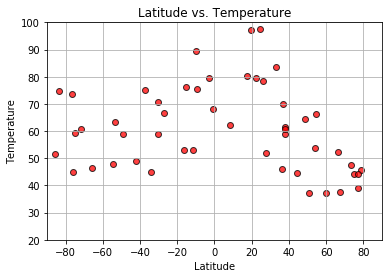

In [12]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature")
plt.xlim(-90,90)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsTemp.png")

## Latitude vs. Humidity Plot

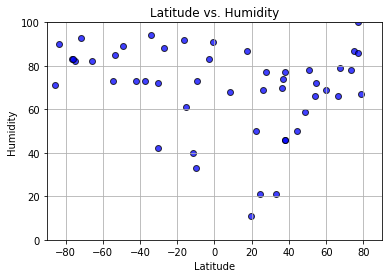

In [13]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Humidity"]

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsHum.png")

## Latitude vs. Cloudiness Plot

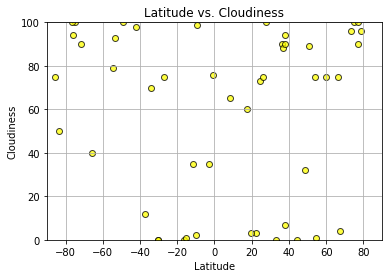

In [14]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Cloudiness"]

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsCloud.png")

## Latitude vs. Wind Speed Plot

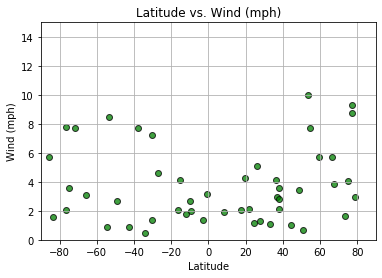

In [15]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Wind (mph)"]

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph)")
plt.xlim(-90,90)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsWind.png")

## Linear Regression

In [ ]:
#Exactly as above, but need to create two new DFs - north and south - and then just run all the same graphs out of them. Easy.

In [18]:
# split the dataframe into two dataframes, North and South
# Your second requirement is to run linear regression on 
# each relationship, only this time separating them into 
# Northern Hemisphere (greater than or equal to 0 degrees 
# latitude) and Southern Hemisphere (less than 0 degrees latitude):

#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

south_df = new_cities.copy()
south_df = south_df.drop(south_df[south_df.lat >= 0].index)
south_df

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
1,-15.700838,-74.940189,cape town,za,59.180,82,100,3.6
3,108.148742,-83.704646,albany,au,74.714,90,50,1.54
4,-60.956286,-30.330961,rafaela,ar,70.592,42,0,1.34
5,-47.585003,-26.972661,porto belo,br,66.740,88,75,4.6
6,-157.931218,-42.430606,mataura,pf,48.992,73,98,0.89
9,-138.082430,-76.579543,rikitea,pf,73.526,83,100,7.76
11,179.036159,-16.305488,asau,tv,53.006,92,0,2.07
12,122.944299,-15.095206,broome,au,76.226,61,1,4.1
14,-20.927122,-37.619869,arraial do cabo,br,75.200,73,12,7.7
15,-72.164030,-30.304313,coquimbo,cl,59.000,72,0,7.2


In [19]:
north_df = new_cities.copy()
north_df = north_df.drop(north_df[north_df.lat <= 0].index)
north_df

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-104.404985,36.374465,raton,us,46.148,70,90,4.1
2,-72.191110,59.702234,iqaluit,ca,37.202,69,75,5.7
7,166.574745,53.820724,nikolskoye,ru,53.744,66,75,10
8,141.210714,8.153284,airai,pw,62.330,68,65,1.95
10,85.835216,17.374257,palasa,in,80.240,87,60,2.07
13,-10.798940,24.336845,atar,mr,97.520,21,73,1.18
16,117.522457,36.885335,mingshui,cn,69.998,74,88,2.95
17,91.096910,50.673266,kyzyl-mazhalyk,ru,37.148,78,89,0.7
19,100.346413,75.096483,khatanga,ru,44.294,87,100,4.03
20,15.433506,22.074840,marzuq,ly,79.610,50,3,2.13


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

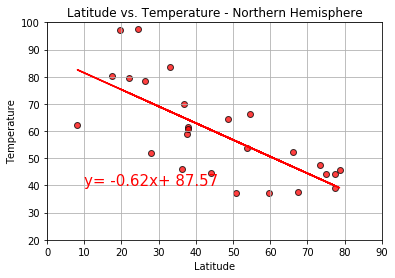

In [50]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsTempNorth.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

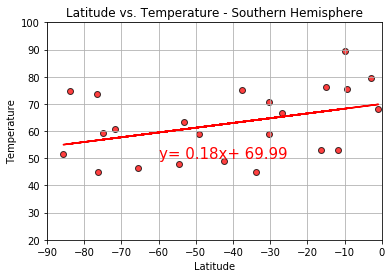

In [49]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-60,50),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsTempSouth.png")

In [ ]:
## Analysis line here for above.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

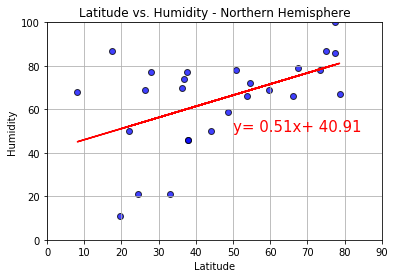

In [60]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Humidity"]

data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

##add regression
#np.cov(label0.astype(float), rowvar=False)

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsHumNorth.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

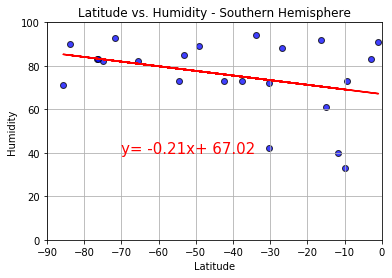

In [61]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Humidity"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-70,40),fontsize=15,color="red")
plt.show()

plt.savefig("LatvsHumSouth.png")

In [ ]:
## Analysis line here for above.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

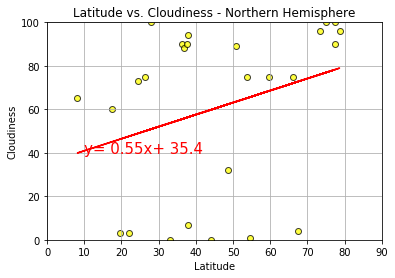

In [62]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Cloudiness"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()
#save as png

plt.savefig("LatvsCloudNorth.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

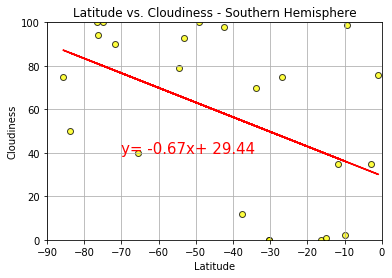

In [64]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Cloudiness"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-70,40),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsCloudSouth.png")

In [ ]:
## Analysis line here for above.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

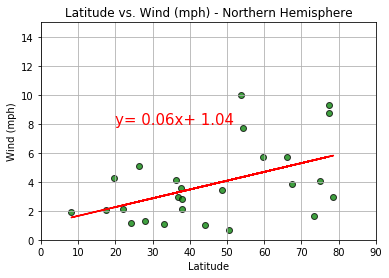

In [67]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Wind (mph)"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph) - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsWindNorth.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

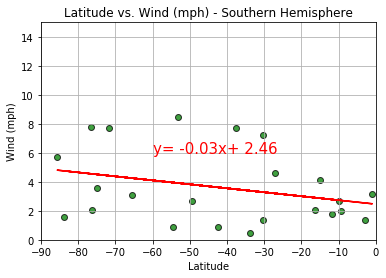

In [70]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Wind (mph)"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph) - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)

##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-60,6),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsWindSouth.png")

In [ ]:
## Analysis line here for above.